In [ ]:
import pandas as pd
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [ ]:
df_meteo  = pd.read_csv('meteo_monthly_all_county_.csv')


In [ ]:
df_meteo.columns

Index(['County', 'Station Name', 'Latitude', 'Longitude', 'Elevation', 'Year',
       'Month', 'Max Temp', 'Number Missing', 'Number Estimated', 'Min Temp',
       'Number Missing.1', 'Number Estimated.1', 'Avg Temp',
       'Number Missing.2', 'Number Estimated.2', 'Avg Bare Soil Temp',
       'Number Missing.3', 'Number Estimated.3', 'Avg Turf Soil Temp',
       'Number Missing.4', 'Number Estimated.4', 'Avg Wind Speed',
       'Number Missing.5', 'Number Estimated.5', 'Max Wind Speed',
       'Number Missing.6', 'Number Estimated.6', 'Total Solar Rad',
       'Number Missing.7', 'Number Estimated.7', 'Avg Penman PET',
       'Number Missing.8', 'Number Estimated.8', 'Total Penman PET',
       'Number Missing.9', 'Number Estimated.9', 'Total Rainfall',
       'Number Missing.10', 'Number Estimated.10', 'Avg Dew Point',
       'Number Missing.11', 'Number Estimated.11', 'Avg Wind Chill',
       'Number Missing.12', 'Number Estimated.12'],
      dtype='object')

In [ ]:
df_meteo = df_meteo[['County','Year','Month','Max Temp','Min Temp','Avg Temp','Avg Bare Soil Temp',
                     'Avg Turf Soil Temp','Avg Wind Speed','Max Wind Speed','Total Solar Rad',
                     'Total Penman PET', 'Avg Penman PET', 'Total Rainfall',
                     'Avg Dew Point','Avg Wind Chill']]

In [ ]:
df_meteo.head()

,County,Year,Month,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Total Solar Rad,Total Penman PET,Avg Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,Slope,2019,9,70.377,45.771,58.074,60.908,59.874,7.731,25.025,308.761,4.442,0.148,5.346,48.947,56.721
1,Slope,2019,10,47.054,25.940,36.497,40.222,42.023,9.570,26.123,221.131,2.814,0.091,1.738,26.733,29.144
2,Slope,2019,11,38.102,18.333,28.217,33.080,33.933,7.834,23.313,139.173,1.329,0.044,NaN,23.065,21.766
3,Slope,2019,12,33.246,15.826,24.536,31.501,32.356,7.637,19.481,109.875,1.013,0.033,NaN,18.611,16.547
4,Slope,2020,1,29.239,10.557,19.898,26.477,27.885,8.639,25.982,124.369,1.110,0.036,NaN,13.703,10.174


In [ ]:
# df_meteo = df_meteo.iloc[1:,:]
# df_meteo.head()

In [ ]:
# for column in df_meteo.columns:
#     df_meteo[column] = df_meteo[column].astype('float')
df_meteo.dtypes

County                 object
Year                    int64
Month                   int64
Max Temp              float64
Min Temp              float64
Avg Temp              float64
Avg Bare Soil Temp    float64
Avg Turf Soil Temp    float64
Avg Wind Speed        float64
Max Wind Speed        float64
Total Solar Rad       float64
Total Penman PET      float64
Avg Penman PET        float64
Total Rainfall        float64
Avg Dew Point         float64
Avg Wind Chill        float64
dtype: object

In [ ]:
df_meteo.isna().sum() #Nan exists in total rainfall and 0 exists too

County                   0
Year                     0
Month                    0
Max Temp                11
Min Temp                11
Avg Temp                11
Avg Bare Soil Temp      11
Avg Turf Soil Temp      11
Avg Wind Speed          11
Max Wind Speed          11
Total Solar Rad         11
Total Penman PET        11
Avg Penman PET          11
Total Rainfall        5730
Avg Dew Point           11
Avg Wind Chill          11
dtype: int64

In [ ]:
# Affichez les lignes où la colonne "Min Temp" a une valeur nulle
df_min_temp_nan = df_meteo[df_meteo['Min Temp'].isna()]

# Affichez uniquement les 11 premières lignes (si vous voulez toutes les lignes, vous pouvez supprimer ".head(11)")
print(df_min_temp_nan.head(11))



      County  Year  Month  Max Temp  Min Temp  Avg Temp  Avg Bare Soil Temp  \
5562  Benson  2018      6       NaN       NaN       NaN                 NaN   
5563  Benson  2018      7       NaN       NaN       NaN                 NaN   
5564  Benson  2018      8       NaN       NaN       NaN                 NaN   
5565  Benson  2018      9       NaN       NaN       NaN                 NaN   
5566  Benson  2018     10       NaN       NaN       NaN                 NaN   
5567  Benson  2018     11       NaN       NaN       NaN                 NaN   
5568  Benson  2018     12       NaN       NaN       NaN                 NaN   
5569  Benson  2019      1       NaN       NaN       NaN                 NaN   
5570  Benson  2019      2       NaN       NaN       NaN                 NaN   
5571  Benson  2019      3       NaN       NaN       NaN                 NaN   
5572  Benson  2019      4       NaN       NaN       NaN                 NaN   

      Avg Turf Soil Temp  Avg Wind Speed  Max Wind 

In [ ]:
# Triez le DataFrame par "County", "Year" et "Month" pour vous assurer que les valeurs suivantes sont disponibles
df_meteo = df_meteo.sort_values(by=['County', 'Year', 'Month'])

# Remplissez les valeurs manquantes pour Benson en utilisant les valeurs des années suivantes
df_meteo.loc[df_meteo['County'] == 'Benson', :] = df_meteo.loc[df_meteo['County'] == 'Benson', :].fillna(method='bfill')

# Affichez les lignes mises à jour pour les années 2018 à 2019
print(df_meteo[(df_meteo['County'] == 'Benson') & (df_meteo['Year'].isin([2018, 2019]))])


      County  Year  Month  Max Temp  Min Temp  Avg Temp  Avg Bare Soil Temp  \
5562  Benson  2018      6    66.093    40.606    53.350              57.732   
5563  Benson  2018      7    66.093    40.606    53.350              57.732   
5564  Benson  2018      8    66.093    40.606    53.350              57.732   
5565  Benson  2018      9    66.093    40.606    53.350              57.732   
5566  Benson  2018     10    66.093    40.606    53.350              57.732   
5567  Benson  2018     11    66.093    40.606    53.350              57.732   
5568  Benson  2018     12    66.093    40.606    53.350              57.732   
5569  Benson  2019      1    66.093    40.606    53.350              57.732   
5570  Benson  2019      2    66.093    40.606    53.350              57.732   
5571  Benson  2019      3    66.093    40.606    53.350              57.732   
5572  Benson  2019      4    66.093    40.606    53.350              57.732   
5573  Benson  2019      5    66.093    40.606    53.

In [ ]:
df_meteo.shape

(14023, 16)

In [ ]:
L = list(df_meteo.columns)

elements_to_remove = ['Day', 'Year', 'Month']

L = [item for item in L if item not in elements_to_remove]

In [ ]:
# Supposons que 'L_sum' représente les colonnes pour lesquelles vous voulez calculer la somme
columns_to_sum = ['Total Solar Rad', 'Total Penman PET', 'Total Rainfall']

# Supposons que 'L_mean' représente les colonnes pour lesquelles vous voulez calculer la moyenne
columns_to_mean = ['Max Temp', 'Min Temp', 'Avg Temp', 'Avg Bare Soil Temp',
                   'Avg Turf Soil Temp', 'Avg Wind Speed', 'Max Wind Speed',
                   'Avg Penman PET', 'Avg Dew Point', 'Avg Wind Chill']

# Group by 'County', 'Year', and 'Month' et calculer la somme pour certaines colonnes et la moyenne pour d'autres
df_meteo_agg = df_meteo.groupby(['County', 'Year', 'Month']).agg({
    **{col: 'sum' for col in columns_to_sum},
    **{col: 'mean' for col in columns_to_mean}
}).reset_index()

# Afficher le DataFrame agrégé
print(df_meteo_agg)


         County  Year  Month  Total Solar Rad  Total Penman PET  \
0         Adams  1990      5          521.759             6.859   
1         Adams  1990      6          611.813             9.168   
2         Adams  1990      7          616.828            10.448   
3         Adams  1990      8          509.065             9.412   
4         Adams  1990      9          416.151             7.947   
...         ...   ...    ...              ...               ...   
14018  Williams  2022     12           96.843             0.695   
14019  Williams  2023      1          115.293             0.406   
14020  Williams  2023      2          211.883             1.006   
14021  Williams  2023      3          339.345             1.198   
14022  Williams  2023      4          394.301             4.125   

       Total Rainfall  Max Temp  Min Temp  Avg Temp  Avg Bare Soil Temp  \
0               1.260    65.884    40.095    52.989              55.582   
1               2.830    79.369    50.848    

In [ ]:
df_meteo_agg.size

224368

In [ ]:
df_meteo_agg.head()

,County,Year,Month,Total Solar Rad,Total Penman PET,Total Rainfall,Max Temp,Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Max Wind Speed,Avg Penman PET,Avg Dew Point,Avg Wind Chill
0,Adams,1990,5,521.759,6.859,1.260,65.884,40.095,52.989,55.582,52.994,8.962,19.402,0.221,40.374,51.998
1,Adams,1990,6,611.813,9.168,2.830,79.369,50.848,65.109,68.710,65.190,9.173,23.472,0.306,51.932,65.414
2,Adams,1990,7,616.828,10.448,0.810,84.744,55.461,70.103,75.959,73.840,8.228,18.428,0.337,52.961,70.685
3,Adams,1990,8,509.065,9.412,0.990,87.200,56.277,71.738,75.420,74.002,7.275,18.813,0.304,52.165,71.631
4,Adams,1990,9,416.151,7.947,0.756,79.623,46.837,63.230,67.354,66.168,7.607,18.220,0.265,38.815,62.617


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df and contains the specified columns
# Adjust the columns as needed
columns_to_expand = ['County', 'Year', 'Max Temp', 'Min Temp', 'Avg Temp', 'Avg Bare Soil Temp', 'Avg Turf Soil Temp',
                     'Avg Wind Speed', 'Max Wind Speed', 'Total Solar Rad', 'Total Penman PET', 'Total Rainfall',
                     'Avg Penman PET', 'Avg Dew Point', 'Avg Wind Chill']

# Map numeric month values to month names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Convert 'Month' column to month names
df_meteo_agg['Month'] = df_meteo_agg['Month'].map(month_mapping)

# Pivot the DataFrame
df_pivot = pd.pivot_table(df_meteo_agg,
                          index=['County', 'Year'],
                          columns=['Month'],
                          values=columns_to_expand,
                          aggfunc='first')

# Flatten the column MultiIndex and reset the index
df_pivot.columns = [f'{col} {month}' for col, month in df_pivot.columns]
df_pivot.reset_index(inplace=True)

# Display the pivoted DataFrame
print(df_pivot)


        County  Year  Avg Bare Soil Temp April  Avg Bare Soil Temp August  \
0        Adams  1990                       NaN                     75.420   
1        Adams  1991                    46.958                     76.742   
2        Adams  1992                    45.918                     68.793   
3        Adams  1993                    43.400                     70.448   
4        Adams  1994                    43.015                     71.961   
...        ...   ...                       ...                        ...   
1220  Williams  2019                    45.589                     71.402   
1221  Williams  2020                    44.482                     77.052   
1222  Williams  2021                    46.586                     70.300   
1223  Williams  2022                    36.877                     75.907   
1224  Williams  2023                    39.010                        NaN   

      Avg Bare Soil Temp December  Avg Bare Soil Temp February  \
0        

In [ ]:
df_pivot.shape

(1225, 158)

In [ ]:
df_pivot.isna().sum()

County                          0
Year                            0
Avg Bare Soil Temp April       43
Avg Bare Soil Temp August      60
Avg Bare Soil Temp December    50
                               ..
Total Solar Rad March          44
Total Solar Rad May            83
Total Solar Rad November       50
Total Solar Rad October        54
Total Solar Rad September      58
Length: 158, dtype: int64

In [ ]:
import pandas as pd

def uppercase_county(df):
    df['County'] = df['County'].str.upper()
    return df

# Applying the function to df_pivot
df_pivot = uppercase_county(df_pivot)


## introduce ag data

In [ ]:
df_ag = pd.read_csv('ND_3types_County_from1990.csv')

In [ ]:
df_ag.isna().sum()

Unnamed: 0                                     0
Year                                           0
Type                                           0
County                                         0
Ag District                                    9
Ag District Code                               0
ACRES HARVESTED                                7
ACRES PLANTED                                  0
ACRES PLANTED, NET                          3113
PRODUCTION, MEASURED IN BU                     7
YIELD, MEASURED IN BU / ACRE                   7
YIELD, MEASURED IN BU / NET PLANTED ACRE    3120
dtype: int64

In [ ]:
# Assuming df_ag is your DataFrame
columns_to_drop = ['ACRES PLANTED, NET', 'YIELD, MEASURED IN BU / NET PLANTED ACRE']

# Use drop method to remove specified columns
df_ag = df_ag.drop(columns=columns_to_drop)

# Reset the index if needed
df_ag = df_ag.reset_index(drop=True)

# Display the updated DataFrame
print(df_ag.head())


   Unnamed: 0  Year                         Type     County    Ag District  \
0           0  2000  WHEAT, SPRING, (EXCL DURUM)      ADAMS      SOUTHWEST   
1           1  2000  WHEAT, SPRING, (EXCL DURUM)     BARNES   EAST CENTRAL   
2           2  2000  WHEAT, SPRING, (EXCL DURUM)     BENSON  NORTH CENTRAL   
3           3  2000  WHEAT, SPRING, (EXCL DURUM)   BILLINGS      SOUTHWEST   
4           4  2000  WHEAT, SPRING, (EXCL DURUM)  BOTTINEAU  NORTH CENTRAL   

   Ag District Code  ACRES HARVESTED  ACRES PLANTED  \
0                70         121000.0       127000.0   
1                60         262000.0       270000.0   
2                20         105000.0       115000.0   
3                70          20000.0        21000.0   
4                20         135000.0       145000.0   

   PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE  
0                   3741000.0                          30.9  
1                  10680000.0                          40.8  
2             

In [ ]:
df_ag = df_ag.drop(df_ag.columns[0], axis=1)
specified_columns = [
    'ACRES HARVESTED', 'ACRES PLANTED',
    'PRODUCTION, MEASURED IN BU', 'YIELD, MEASURED IN BU / ACRE']
df_ag['Calculated Yield'] = df_ag['PRODUCTION, MEASURED IN BU'] / df_ag['ACRES PLANTED']
df_ag = df_ag.drop(specified_columns,axis=1)
df_ag.head()

,Year,Type,County,Ag District,Ag District Code,Calculated Yield
0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.456693
1,2000,"WHEAT, SPRING, (EXCL DURUM)",BARNES,EAST CENTRAL,60,39.555556
2,2000,"WHEAT, SPRING, (EXCL DURUM)",BENSON,NORTH CENTRAL,20,29.539130
3,2000,"WHEAT, SPRING, (EXCL DURUM)",BILLINGS,SOUTHWEST,70,29.285714
4,2000,"WHEAT, SPRING, (EXCL DURUM)",BOTTINEAU,NORTH CENTRAL,20,31.834483


In [ ]:
df_ag.isna().sum()

Year                0
Type                0
County              0
Ag District         9
Ag District Code    0
Calculated Yield    7
dtype: int64

In [ ]:
df_ag

,Year,Type,County,Ag District,Ag District Code,Calculated Yield
0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.456693
1,2000,"WHEAT, SPRING, (EXCL DURUM)",BARNES,EAST CENTRAL,60,39.555556
2,2000,"WHEAT, SPRING, (EXCL DURUM)",BENSON,NORTH CENTRAL,20,29.539130
3,2000,"WHEAT, SPRING, (EXCL DURUM)",BILLINGS,SOUTHWEST,70,29.285714
4,2000,"WHEAT, SPRING, (EXCL DURUM)",BOTTINEAU,NORTH CENTRAL,20,31.834483
...,...,...,...,...,...,...
3851,1999,"WHEAT, WINTER",TOWNER,NORTHEAST,30,29.555556
3852,1999,"WHEAT, WINTER",TRAILL,EAST CENTRAL,60,42.909091
3853,1999,"WHEAT, WINTER",WARD,NORTHWEST,10,28.600000
3854,1999,"WHEAT, WINTER",WELLS,CENTRAL,50,27.857143


In [ ]:
df_ag.Type.unique()

array(['WHEAT, SPRING, (EXCL DURUM)', 'WHEAT, SPRING, DURUM',
       'WHEAT, WINTER'], dtype=object)

In [ ]:
df_ag.dtypes

Year                  int64
Type                 object
County               object
Ag District          object
Ag District Code      int64
Calculated Yield    float64
dtype: object

In [ ]:
df_ag.isna().sum()

Year                0
Type                0
County              0
Ag District         9
Ag District Code    0
Calculated Yield    7
dtype: int64

In [ ]:
df_ag.shape

(3856, 6)

In [ ]:
# Assuming df_ag and df_pivot are the DataFrames you want to merge
df_all = pd.merge(df_ag, df_pivot, on=['County', 'Year'], how='inner')


In [ ]:
df_all.head()

,Year,Type,County,Ag District,Ag District Code,Calculated Yield,Avg Bare Soil Temp April,Avg Bare Soil Temp August,Avg Bare Soil Temp December,Avg Bare Soil Temp February,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
0,2000,"WHEAT, SPRING, (EXCL DURUM)",ADAMS,SOUTHWEST,70,29.456693,46.845,73.752,31.710,27.342,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
1,2000,"WHEAT, SPRING, DURUM",ADAMS,SOUTHWEST,70,30.937500,46.845,73.752,31.710,27.342,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
2,2000,"WHEAT, WINTER",ADAMS,SOUTHWEST,70,35.636364,46.845,73.752,31.710,27.342,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
3,2000,"WHEAT, SPRING, (EXCL DURUM)",BARNES,EAST CENTRAL,60,39.555556,37.646,70.361,29.173,29.100,...,101.999,189.332,113.329,510.045,518.709,304.525,432.396,117.758,202.139,331.623
4,2000,"WHEAT, SPRING, DURUM",BARNES,EAST CENTRAL,60,31.538462,37.646,70.361,29.173,29.100,...,101.999,189.332,113.329,510.045,518.709,304.525,432.396,117.758,202.139,331.623


In [ ]:
df_all.shape

(2199, 162)

In [ ]:
df_all['Calculated Yield'].isna().sum()

3

In [ ]:
df_all[['Year','Calculated Yield']].dtypes

Year                  int64
Calculated Yield    float64
dtype: object

In [ ]:
df_all['County'].unique()

array(['ADAMS', 'BARNES', 'BOTTINEAU', 'BOWMAN', 'CASS', 'CAVALIER',
       'DICKEY', 'EMMONS', 'FOSTER', 'GOLDEN VALLEY', 'GRAND FORKS',
       'KIDDER', 'MCKENZIE', 'MCLEAN', 'MERCER', 'MORTON', 'PEMBINA',
       'RAMSEY', 'RENVILLE', 'RICHLAND', 'ROLETTE', 'STARK', 'STUTSMAN',
       'TOWNER', 'TRAILL', 'WALSH', 'WARD', 'WELLS', 'WILLIAMS', 'BURKE',
       'MCHENRY', 'MCINTOSH', 'DIVIDE', 'HETTINGER', 'MOUNTRAIL',
       'NELSON', 'PIERCE', 'RANSOM', 'DUNN', 'GRIGGS', 'STEELE', 'GRANT',
       'BENSON', 'BILLINGS', 'SLOPE', 'SHERIDAN', 'SARGENT', 'BURLEIGH'],
      dtype=object)

## Choose the wheat type:

In [ ]:
##Try removing Other Counties..
df_all = df_all[(df_all['County'] != 'OTHER (COMBINED) COUNTIES') & (df_all['County'] != 'OTHER COUNTIES')]
##

dict_type = dict({1: 'WHEAT, SPRING, (EXCL DURUM)' , 2: 'WHEAT, SPRING, DURUM', 3:'WHEAT, WINTER'})
select_type = 1



df_selected = df_all[df_all['Type'] == dict_type[select_type]]
if select_type == 1:
    df_selected = df_selected.dropna(subset=['Calculated Yield'])

### 'WHEAT, SPRING, (EXCL DURUM)'
### 'WHEAT, SPRING, DURUM'
###   'WHEAT, WINTER'

In [ ]:
numeric_df = df_selected.select_dtypes(include='number')
numeric_df

,Year,Ag District Code,Calculated Yield,Avg Bare Soil Temp April,Avg Bare Soil Temp August,Avg Bare Soil Temp December,Avg Bare Soil Temp February,Avg Bare Soil Temp January,Avg Bare Soil Temp July,Avg Bare Soil Temp June,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
0,2000,70,29.456693,46.845,73.752,31.710,27.342,25.090,71.141,63.824,...,131.218,255.180,162.093,587.745,618.084,373.497,543.202,147.631,253.259,418.751
3,2000,60,39.555556,37.646,70.361,29.173,29.100,27.833,66.869,59.887,...,101.999,189.332,113.329,510.045,518.709,304.525,432.396,117.758,202.139,331.623
6,2000,20,31.834483,42.141,68.175,32.772,30.553,29.690,72.989,61.757,...,101.222,218.990,119.536,569.502,524.723,326.978,498.939,127.144,224.648,319.543
9,2000,70,24.924051,45.873,72.278,29.855,29.342,28.305,71.862,63.630,...,116.697,244.175,152.569,548.264,556.367,329.930,502.096,153.533,229.416,381.252
12,2000,60,41.424615,42.739,73.854,24.027,25.789,18.820,74.731,64.985,...,121.193,205.798,134.306,519.841,507.008,305.400,464.720,118.257,190.754,338.927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,1999,60,34.967742,44.070,69.855,25.946,25.703,18.339,72.962,67.323,...,86.254,212.533,129.751,531.507,519.570,346.811,414.263,138.690,203.387,290.948
2188,1999,30,37.837209,40.448,67.819,31.035,29.332,25.897,71.602,65.451,...,96.748,210.640,138.381,553.426,534.865,356.852,435.702,132.363,207.952,287.040
2190,1999,10,21.398551,42.537,68.936,30.303,29.180,24.088,71.540,65.421,...,120.366,218.156,133.866,575.040,510.191,365.385,453.945,148.100,238.350,308.210
2193,1999,50,28.194595,41.169,68.019,31.208,30.343,29.802,70.002,64.426,...,119.412,228.871,136.387,580.433,536.478,384.378,473.457,154.829,230.450,306.470


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df_selected is your original DataFrame
numeric_df = df_selected.select_dtypes(include='number')

# Check for constant columns
constant_columns = numeric_df.columns[numeric_df.nunique() == 1]
print("Constant columns:", constant_columns)

# Remove constant columns
numeric_df = numeric_df.drop(columns=constant_columns)

# Check for missing values
missing_values = numeric_df.isnull().sum()
print("Columns with missing values:", missing_values[missing_values > 0])

# Drop rows with missing values (or handle missing values appropriately)
numeric_df = numeric_df.dropna()

# Apply z-score normalization using sklearn's StandardScaler
scaler = StandardScaler()
numeric_df_normalized = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Display the normalized DataFrame
print(numeric_df_normalized.head())


Constant columns: Index([], dtype='object')
Columns with missing values: Avg Bare Soil Temp April       39
Avg Bare Soil Temp August       9
Avg Bare Soil Temp December     1
Avg Bare Soil Temp February    39
Avg Bare Soil Temp January     40
                               ..
Total Solar Rad March          39
Total Solar Rad May            30
Total Solar Rad November        1
Total Solar Rad October         4
Total Solar Rad September       7
Length: 156, dtype: int64
       Year  Ag District Code  Calculated Yield  Avg Bare Soil Temp April  \
0 -0.913335          0.941931         -0.693370                  1.165544   
1 -0.913335          0.541978          0.134509                 -0.961969   
2 -0.913335         -1.057836         -0.498445                  0.077619   
3 -0.913335          0.941931         -1.064945                  0.940743   
4 -0.913335          0.541978          0.287730                  0.215922   

   Avg Bare Soil Temp August  Avg Bare Soil Temp December  \
0  

In [ ]:

# Normalize the DataFrame
# numeric_df = numeric_df.apply(zscore)
# Calculate the correlation matrix on the normalized DataFrame
corr_matrix = numeric_df_normalized.corr()

In [ ]:
corr_matrix.head()

,Year,Ag District Code,Calculated Yield,Avg Bare Soil Temp April,Avg Bare Soil Temp August,Avg Bare Soil Temp December,Avg Bare Soil Temp February,Avg Bare Soil Temp January,Avg Bare Soil Temp July,Avg Bare Soil Temp June,...,Total Solar Rad December,Total Solar Rad February,Total Solar Rad January,Total Solar Rad July,Total Solar Rad June,Total Solar Rad March,Total Solar Rad May,Total Solar Rad November,Total Solar Rad October,Total Solar Rad September
Year,1.000000,-0.017486,0.483502,-0.136172,0.056542,0.106572,-0.180628,0.209717,0.308065,0.272936,...,0.008059,0.220510,-0.127818,0.217834,0.276155,-0.023556,-0.049295,-0.013483,-0.013168,-0.037001
Ag District Code,-0.017486,1.000000,-0.013920,0.167304,0.238392,0.145773,0.122867,0.090195,0.167717,0.239344,...,0.451722,0.149868,0.339643,0.045620,0.167715,0.072862,-0.009157,0.320068,0.230149,0.254336
Calculated Yield,0.483502,-0.013920,1.000000,-0.164245,-0.049706,0.173415,-0.034653,0.095753,-0.049634,0.081671,...,-0.214630,0.004353,-0.094322,-0.149230,-0.123511,-0.193959,-0.195029,-0.254180,-0.260284,-0.325650
Avg Bare Soil Temp April,-0.136172,0.167304,-0.164245,1.000000,0.269731,0.025888,0.123379,-0.029559,0.431065,0.253893,...,0.116716,-0.275258,-0.079600,0.156723,0.041926,-0.200484,-0.017299,0.083973,0.222207,0.046712
Avg Bare Soil Temp August,0.056542,0.238392,-0.049706,0.269731,1.000000,-0.077123,-0.082757,-0.092092,0.616103,0.459889,...,0.302485,-0.002265,0.015721,0.281773,0.054276,-0.112964,-0.066839,0.106690,0.340631,0.209291


Columns with correlation > 0.2 with 'Calculated Yield': ['Year', 'Calculated Yield', 'Avg Dew Point August', 'Avg Dew Point July', 'Avg Dew Point September', 'Avg Temp May', 'Avg Wind Chill May', 'Min Temp June', 'Min Temp May', 'Min Temp September', 'Total Rainfall September']


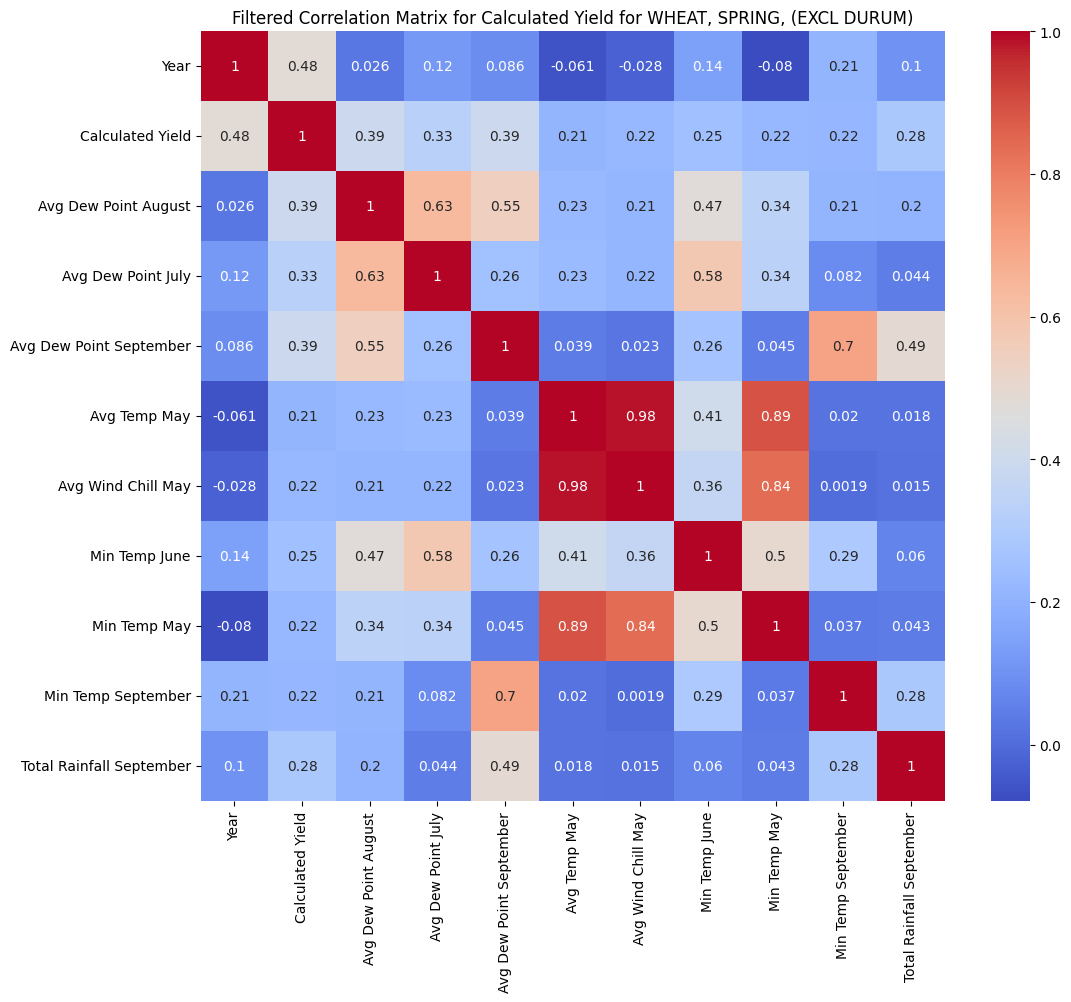

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named corr_matrix which is a correlation matrix

# The column of interest
column_of_interest = 'Calculated Yield'

# Check if the column of interest is in the correlation matrix
if column_of_interest in corr_matrix.index:
    # Find columns with correlation greater than 0.5
    high_corr_columns = corr_matrix[column_of_interest][corr_matrix[column_of_interest] > 0.2].index.tolist()

    # Ensure the column of interest is included in the list
    if column_of_interest not in high_corr_columns:
        high_corr_columns.append(column_of_interest)

    # Print the columns with high correlation
    print("Columns with correlation > 0.2 with 'Calculated Yield':", high_corr_columns)

    # Filtering the correlation matrix to include only the relevant columns
    filtered_corr_matrix = corr_matrix.loc[high_corr_columns, high_corr_columns]

    # Plotting the filtered correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Filtered Correlation Matrix for Calculated Yield for {dict_type[select_type]}")
    plt.show()
else:
    print(f"'{column_of_interest}' is not in the correlation matrix.")


In [ ]:
df_selected.dtypes

Year                           int64
Type                          object
County                        object
Ag District                   object
Ag District Code               int64
                              ...   
Total Solar Rad March        float64
Total Solar Rad May          float64
Total Solar Rad November     float64
Total Solar Rad October      float64
Total Solar Rad September    float64
Length: 162, dtype: object

Constant columns: Index(['Type'], dtype='object')
Columns with missing values: Avg Bare Soil Temp April       39
Avg Bare Soil Temp August       9
Avg Bare Soil Temp December     1
Avg Bare Soil Temp February    39
Avg Bare Soil Temp January     40
                               ..
Total Solar Rad March          39
Total Solar Rad May            30
Total Solar Rad November        1
Total Solar Rad October         4
Total Solar Rad September       7
Length: 156, dtype: int64
Coefficients: [ 6.22656807e-01  4.05538449e-02  2.01114910e-01  5.90960470e-01
  9.06636829e-02  2.29242155e-02  1.71084727e-01  7.45947107e-03
  1.04429592e-01 -7.92570115e-01 -2.09207481e-01  5.54374930e-02
  6.70777388e-01 -1.23204841e+00 -2.28667275e-01  1.13195927e+00
 -8.71727616e-01 -1.43951288e+00  2.75036777e-01  7.39971096e-01
 -8.21072585e-01  1.55738659e+00 -1.73027619e+00  4.88700094e-01
  2.64916122e-01  7.83136387e-02 -2.84780073e+02  2.95565656e+02
  9.58024787e+02 -2.08441773e+03 -1.97638877e+01  2.

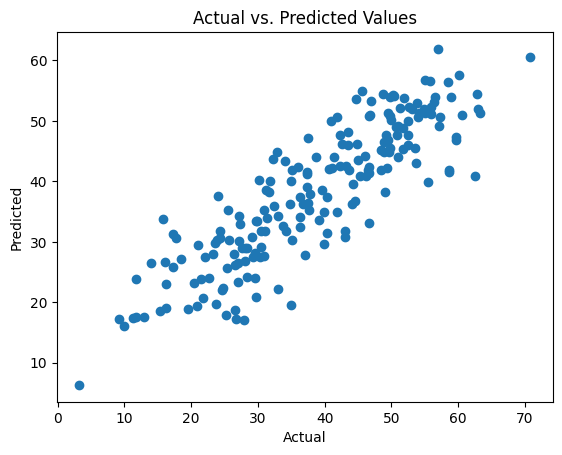

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df_selected is your DataFrame with numerical features
# Assuming 'Calculated Yield' is the target variable
target_variable = 'Calculated Yield'

# Check for constant columns
constant_columns = df_selected.columns[df_selected.nunique() == 1]
print("Constant columns:", constant_columns)

# Remove constant columns
df_selected = df_selected.drop(columns=constant_columns)

# Drop 'County' and 'Ag District' columns
columns_to_drop = ['County', 'Ag District']
df_selected = df_selected.drop(columns=columns_to_drop)

# Check for missing values
missing_values = df_selected.isnull().sum()
print("Columns with missing values:", missing_values[missing_values > 0])

# Create a new DataFrame without missing values
df_selected_no_missing = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected_no_missing.drop(columns=[target_variable])
y = df_selected_no_missing[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients
print("Coefficients:", model.coef_)

# Plot the predicted vs. actual values for the test set
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()


Linear Regression - Mean Squared Error: 45.27869802741095
Random Forest Regressor - Mean Squared Error: 47.40084522571563
Gradient Boosting Regressor - Mean Squared Error: 44.69047250941142


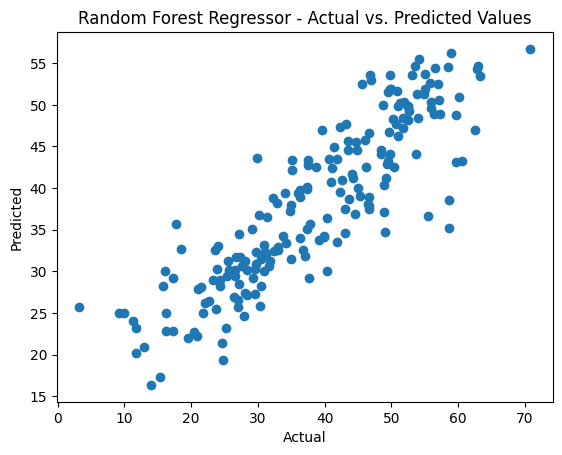

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Split the data into features (X) and target variable (y)
X = df_selected_no_missing.drop(columns=[target_variable])
y = df_selected_no_missing[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")

# Plot the predicted vs. actual values for the Random Forest Regressor
rf_model = models['Random Forest Regressor']
rf_y_pred = rf_model.predict(X_test)

plt.scatter(y_test, rf_y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Regressor - Actual vs. Predicted Values")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f"Ridge Regression - Mean Squared Error: {ridge_mse}")


Ridge Regression - Mean Squared Error: 46.129184418942025


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print(f"Lasso Regression - Mean Squared Error: {lasso_mse}")


Lasso Regression - Mean Squared Error: 61.56426185015279


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
svr_y_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_y_pred)
print(f"SVR - Mean Squared Error: {svr_mse}")


SVR - Mean Squared Error: 56.33182703048511


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
print(f"K-Nearest Neighbors - Mean Squared Error: {knn_mse}")


K-Nearest Neighbors - Mean Squared Error: 55.30074262296191


Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1427.7499 - val_loss: 1345.0012
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1080.9221 - val_loss: 901.9976
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 606.6401 - val_loss: 406.7737
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 322.5136 - val_loss: 251.3861
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 246.6274 - val_loss: 194.6308
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 199.9912 - val_loss: 160.7704
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 175.5385 - val_loss: 139.2746
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 147.7147 - val_loss: 124.4157
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 133.6884 - val_loss: 112.0834
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - l

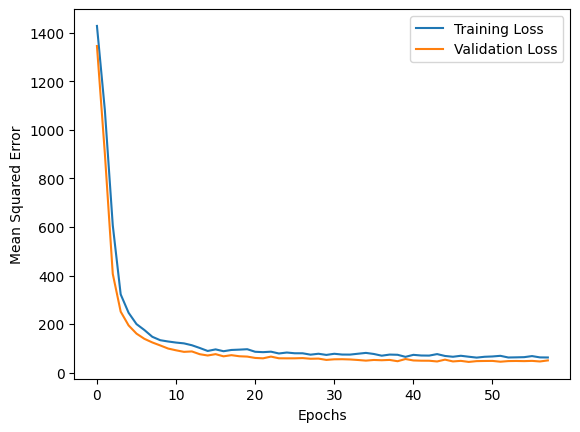

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Neural Network - Mean Squared Error: {mse}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
